In [13]:
%matplotlib inline
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs  
from sklearn import metrics
import seaborn as sns 
import matplotlib.ticker as mtick

In [18]:
# For K-means group
filename1 = r'.\k-means-data.csv'
data=pd.read_csv(filename1,sep=',')
X1=data["number of charging events per station per hour"].values.reshape(-1, 1)
X = StandardScaler().fit_transform(X1)  #标准化
Kmeans=KMeans(n_clusters=3,n_init=10,random_state=1) 
Kmeans.fit(X)
print("Labels for each data point:", Kmeans.labels_)

C:\Users\77270\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels for each data point: [1 1 1 0 0 0 0 2 2 2 2 2]


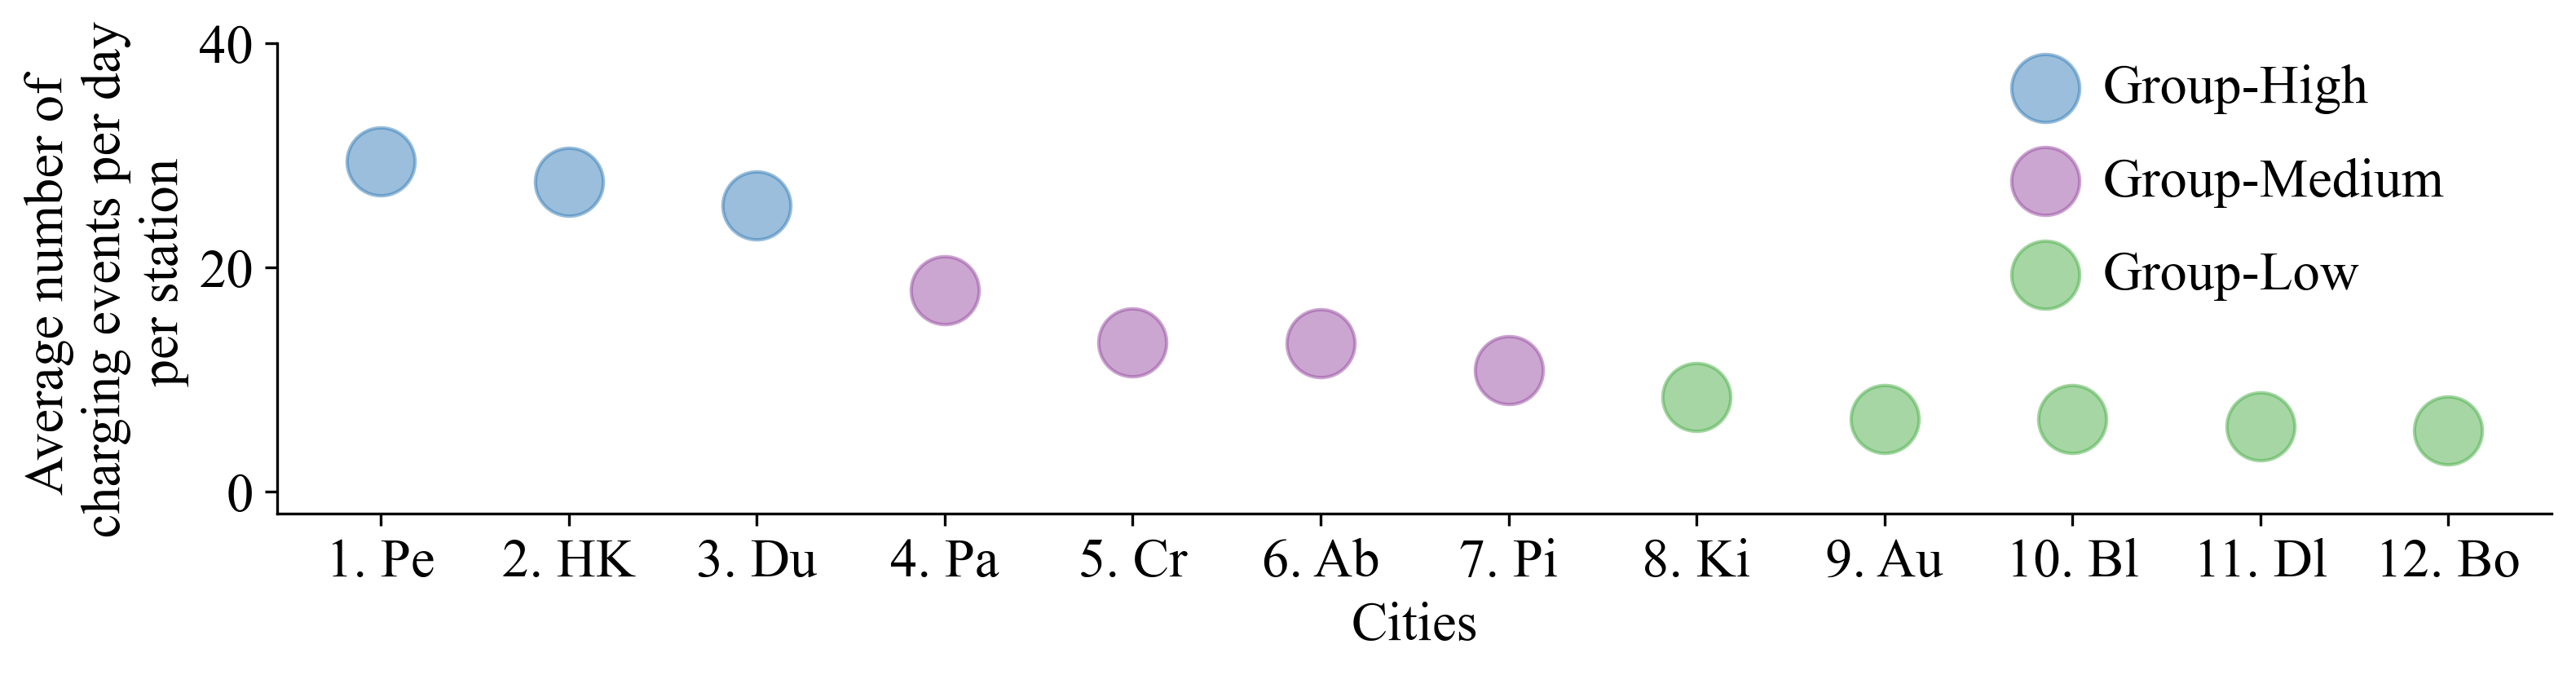

In [22]:
#Figure1 b
citytitle = ["1. Pe", "2. HK", "3. Du",  "4. Pa", "5. Cr", "6. Ab", "7. Pi", "8. Ki", "9. Au", "10. Bl", "11. Dl", "12. Bo"]
colour = sns.color_palette("Set1", 13)
size=16
s=400
alpha=0.5
fig=plt.figure(figsize=(12,2.5), dpi=300)
plt.rc('font',family='Times New Roman', size=size)
ax = plt.axes(polar=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.scatter(range(0,3),X1[0:3,0]*24,color=colour[1],label="Group-High",alpha=alpha,s=s)  
ax.scatter(range(3,7),X1[3:7,0]*24,color=colour[3],label="Group-Medium",alpha=alpha,s=s)  
ax.scatter(range(7,12),X1[7:12,0]*24,color=colour[2],label="Group-Low",alpha=alpha,s=s)  

#plt.title("K-means",y=0.8)  
plt.xticks(range(0,12,1),citytitle,size=size)
plt.ylim(-2,40)

ax.set_facecolor(colour[0])
ax.patch.set_alpha(0) 

ax.set_ylabel("Average number of \n charging events per day \n per station",labelpad = 3)   
ax.set_xlabel("Cities")
ax.legend(ncol=1, framealpha=0,labelspacing=0.8,bbox_to_anchor=(0.75,0.35),handlelength=0.5)
fig.savefig('Figure1(b).svg', format='svg',transparent=True, bbox_inches='tight', pad_inches=0.0)
plt.show()

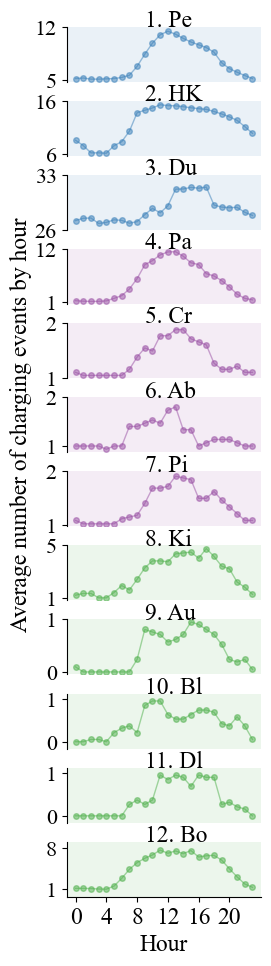

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# read data
filename2 = r'.\city_charging demand.csv'
datacity = pd.read_csv(filename2, sep=',')

citytitle = ["1. Pe", "2. HK", "3. Du",  "4. Pa", "5. Cr", "6. Ab", "7. Pi", "8. Ki", "9. Au", "10. Bl", "11. Dl", "12. Bo"]

# cityname
cityname = [name.split('-')[1] for name in datacity.columns if "-" in name and "TIME" not in name and "hour" not in name]

l = 12
size = 17
colour = sns.color_palette("Set1", 13)

fig = plt.figure(figsize=(6, 11.3), dpi=100)
plt.rc('font', family='Times New Roman', size=size)

for i in range(1, 13):
    city_data_col = f"{i}-{cityname[i-1]}"
    t = datacity.groupby('hour')[city_data_col].mean()
    ax = plt.subplot(12, 2, 2 * i)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.39, hspace=0.35)

    if i <= 3:
        c = 1
    elif i <= 7:
        c = 3
    else:
        c = 2
    ax.set_facecolor(colour[c])
    ax.patch.set_alpha(0.1)
    plt.plot(t, color=colour[c], marker=".", markersize=8, linewidth=1, alpha=0.5)

    plt.xticks(range(0, 24, 4))
    plt.title(citytitle[i-1], fontdict={'size': size}, loc='left', x=.4, y=0.85)

    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.f'))
    plt.yticks((min(t) * 0.97, max(t) * 1.05), fontsize=size-1)

    if i < 12:
        plt.xticks([])
    if i >= 10:
        plt.ylim(-0.1, max(t) * 1.18)
    if i == 6:
        plt.yticks([1, 1.5])
        plt.ylabel("Average number of charging events by hour", labelpad=10)
    if i == 12:
        plt.xlabel("Hour")
        ax.spines['bottom'].set_visible(True)
fig.savefig('Figure1(c).svg', format='svg',bbox_inches='tight', pad_inches=0.0)
plt.show()

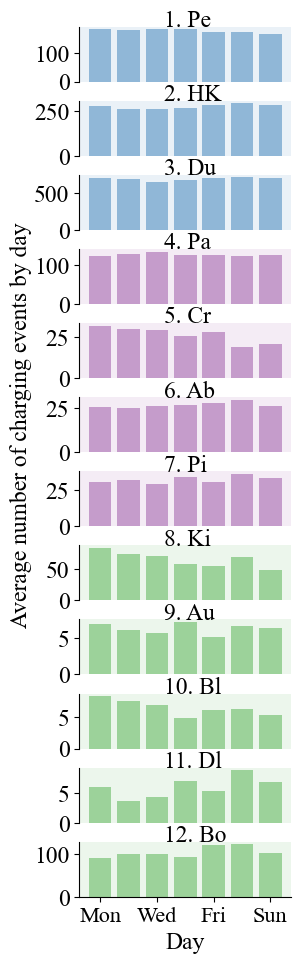

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# 模拟数据
filename2 = r'.\city_charging demand.csv'
datacity=pd.read_csv(filename2,sep=',').iloc[:,0:]#sep=','encoding='utf-8'


datacity1 = pd.DataFrame(datacity)

fig = plt.figure(figsize=(6, 11.3), dpi=100)
size = 17
plt.rc('font', family='Times New Roman', size=size)
l = 12
colour = sns.color_palette("Set1", 13)
cityname = [name.split('-')[1] for name in datacity1.columns if "-" in name and "TIME" not in name]
citytitle = ["1. Pe", "2. HK", "3. Du",  "4. Pa", "5. Cr", "6. Ab", "7. Pi", "8. Ki", "9. Au", "10. Bl", "11. Dl", "12. Bo"]

for i in range(1, 13):
    city_time_col = f"TIME({i}-{cityname[i-1]})"
    city_data_col = f"{i}-{cityname[i-1]}"
    
    # transfer to weekday
    datacity1['week'] = pd.to_datetime(datacity1[city_time_col]).dt.dayofweek
    t = datacity1.groupby('week')[city_data_col].mean()

    ax = plt.subplot(12, 2, 2 * i - 1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.19, hspace=0.35)

    if i <= 3:
        c = 1
    elif i <= 7:
        c = 3
    else:
        c = 2

    ax.set_facecolor(colour[c])
    ax.patch.set_alpha(0.1)
    plt.bar(range(1, len(t) + 1), t * 24, color=colour[c], alpha=0.5)
    plt.xticks([1, 3, 5, 7], ['Mon', 'Wed', 'Fri', 'Sun'], size=size - 1)
    plt.title(citytitle[i-1], fontdict={'size': size}, loc='left', x=.4, y=0.85)

    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.f'))

    if i < 12:
        plt.xticks([])
    if i == 6:
        plt.ylabel("Average number of charging events by day", labelpad=10)
    if i == 12:
        plt.xlabel("Day")
        ax.spines['bottom'].set_visible(True)
fig.savefig('Figure1(d).svg', format='svg',bbox_inches='tight', pad_inches=0.0)
plt.show()
